# Pandas Data Analysis Exercise

Download [Chipotle Dataset](https://github.com/subashgandyer/datasets/blob/main/chipotle.tsv) to walkthrough this exercise

### Import the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# set this so the 
%matplotlib inline

### Read the dataset into a dataframe

In [5]:
url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### Display the first few samples

In [6]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Find out how many number of samples in the dataset

In [7]:
chipo.shape[0]

4622

In [8]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Find out how many number of features in the dataset

In [9]:
chipo.shape[1]

5

### What are the feature names in the dataset

In [10]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### How is the dataset indexed?

In [11]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Which was the most-ordered item? 

### Long way: Groupby item_name, Sum, Sort on quantity, Display in descending order

In [12]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Concise Pythonic way solution

In [33]:
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False)[:1]

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [18]:
chipo.groupby('item_name').agg({'quantity': 'sum'}).sort_values('quantity', ascending=False)[:1]

,quantity
item_name,
Chicken Bowl,761


### For the most-ordered item, how many items were ordered?

In [13]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)['quantity']

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

### What was the most ordered item in the choice_description column?

In [14]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### How many items were orderd in total?

In [15]:
total_items_orders = chipo.quantity.sum()
total_items_orders

4972

### Convert the item price into a float

### Long and slow way: Writing a function to convert item price to float and then apply it over dataframe

#### Check the item price type

In [34]:
chipo.item_price.dtype

dtype('O')

#### Create a function to convert the item price into float

In [35]:
def float_converter(x):
    return float(x[1:-1])

In [36]:
chipo.item_price = chipo.item_price.apply(float_converter)

In [37]:
chipo.item_price.dtype

dtype('float64')

#### Reset the converstion back to string to try lambda function conversion

In [ ]:
chipo = pd.read_csv("https://raw.githubusercontent.com/subashgandyer/datasets/main/chipotle.tsv", sep="\t")
chipo

#### Create a lambda function and change the type of item price

In [38]:
float_converter = lambda x: float(x[1:-1])
chipo.item_price_float_lam = chipo.item_price.apply(float_converter)

TypeError: 'float' object is not subscriptable

#### Check the item price type

In [39]:
chipo.item_price_float_lam.dtype

AttributeError: 'DataFrame' object has no attribute 'item_price_float_lam'

### Complex

In [40]:
chipo.item_price.str.slice(1).astype(float)

AttributeError: Can only use .str accessor with string values!

### How much was the revenue for the period in the dataset?

In [41]:
revenue = (chipo['quantity']* chipo['item_price']).sum()
revenue

39237.02

### How many orders were made in the period?

In [42]:
orders = chipo.order_id.value_counts().count()
orders

1834

In [43]:
chipo.order_id.nunique()

1834

### What is the average revenue amount per order?

In [44]:
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
order_grouped = chipo.groupby(by=['order_id']).sum()
order_grouped.mean()['revenue']

21.39423118865867

In [45]:
chipo.groupby(by=['order_id']).sum().mean()['revenue']

21.39423118865867

In [46]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [47]:
chipo['item_price'] = chipo['item_price'].str.slice(1).astype(float)

AttributeError: Can only use .str accessor with string values!

In [48]:
chipo['revenue'] = chipo['item_price'] * chipo['quantity']

In [49]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,33.96


In [50]:
order_group = chipo.groupby('order_id').sum()

In [51]:
order_group

,quantity,item_price,revenue
order_id,,,
1,4,11.56,11.56
2,2,16.98,33.96
3,2,12.67,12.67
4,2,21.00,21.00
5,2,13.70,13.70
...,...,...,...
1830,2,23.00,23.00
1831,3,12.90,12.90
1832,2,13.20,13.20


In [52]:
order_group.mean()

quantity       2.711014
item_price    18.811429
revenue       21.394231
dtype: float64

In [53]:
order_group.mean()['revenue']

21.39423118865867

### How many different items are sold?

In [54]:
chipo.item_name.value_counts().count()

50

In [55]:
url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### How many products cost more than $10

In [56]:
# clean the item_price column and transform it in a float
# prices = [float(value[1 : -1]) for value in chipo.item_price]
prices = chipo.item_price.str.slice(1).astype(float)

# reassign the column with the cleaned prices
chipo.item_price = prices

# delete the duplicates in item_name and quantity
chipo_filtered = chipo.drop_duplicates(['item_name','quantity','choice_description'])

# chipo_filtered

# select only the products with quantity equals to 1
chipo_one_prod = chipo_filtered[chipo_filtered.quantity == 1]
chipo_one_prod

# chipo_one_prod[chipo_one_prod['item_price']>10].item_name.nunique()
# chipo_one_prod[chipo_one_prod['item_price']>10]



# chipo.query('price_per_item > 10').item_name.nunique()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4602,1827,1,Barbacoa Burrito,[Tomatillo Green Chili Salsa],9.25
4607,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, S...",11.75
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25


In [57]:
chipo['item_price'] = chipo.item_price.str.slice(1).astype(float)

AttributeError: Can only use .str accessor with string values!

In [58]:
(chipo['item_price'] > 10).sum()

1130

In [59]:
products = chipo.groupby('item_name').agg({'item_price': 'max'})
products.head()

,item_price
item_name,
6 Pack Soft Drink,12.98
Barbacoa Bowl,11.75
Barbacoa Burrito,11.75
Barbacoa Crispy Tacos,18.50
Barbacoa Salad Bowl,11.89


In [60]:
(products.item_price > 10).sum()

31

### Sort by item name

In [61]:
chipo.item_name.sort_values()

# OR

chipo.sort_values(by = "item_name")

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
341,148,1,6 Pack Soft Drink,[Diet Coke],6.49
1849,749,1,6 Pack Soft Drink,[Coke],6.49
1860,754,1,6 Pack Soft Drink,[Diet Coke],6.49
2713,1076,1,6 Pack Soft Drink,[Coke],6.49
...,...,...,...,...,...
2384,948,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
781,322,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Black Beans, Cheese, Sou...",8.75
2851,1132,1,Veggie Soft Tacos,"[Roasted Chili Corn Salsa (Medium), [Black Bea...",8.49
1699,688,1,Veggie Soft Tacos,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25


### What is the quantity of the most expensive order?

In [43]:
chipo.sort_values(by = "item_price", ascending = False).head(1)

,order_id,quantity,item_name,choice_description,item_price,revenue
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25,663.75


In [62]:
chipo.item_price.idxmax()

3598

In [63]:
chipo.loc[3598, :]

order_id                                      1443
quantity                                        15
item_name             Chips and Fresh Tomato Salsa
choice_description                             NaN
item_price                                   44.25
Name: 3598, dtype: object

### How many times a Veggie Salad Bowl ordered?

In [64]:
chipo_salad = chipo[chipo.item_name == "Veggie Salad Bowl"]

len(chipo_salad)

18

In [65]:
chipo[chipo.item_name == "Veggie Salad Bowl"].quantity.sum()

18

### How many items more than one canned soda is ordered?

In [66]:
chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]
len(chipo_drink_steak_bowl)

20

In [67]:
chipo[chipo.item_name == "Canned Soda"]

,order_id,quantity,item_name,choice_description,item_price
18,9,2,Canned Soda,[Sprite],2.18
28,14,1,Canned Soda,[Dr. Pepper],1.09
51,23,2,Canned Soda,[Mountain Dew],2.18
53,24,1,Canned Soda,[Sprite],1.09
107,47,1,Canned Soda,[Dr. Pepper],1.09
...,...,...,...,...,...
3897,1562,1,Canned Soda,[Mountain Dew],1.09
3926,1575,1,Canned Soda,[Dr. Pepper],1.09
3936,1578,1,Canned Soda,[Diet Dr. Pepper],1.09
4008,1604,1,Canned Soda,[Diet Coke],1.09


In [68]:
chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]

,order_id,quantity,item_name,choice_description,item_price
18,9,2,Canned Soda,[Sprite],2.18
51,23,2,Canned Soda,[Mountain Dew],2.18
162,73,2,Canned Soda,[Diet Coke],2.18
171,76,2,Canned Soda,[Diet Dr. Pepper],2.18
350,150,2,Canned Soda,[Diet Coke],2.18
352,151,2,Canned Soda,[Coca Cola],2.18
698,287,2,Canned Soda,[Coca Cola],2.18
700,288,2,Canned Soda,[Coca Cola],2.18
909,376,2,Canned Soda,[Mountain Dew],2.18
1091,450,2,Canned Soda,[Dr. Pepper],2.18


In [69]:
chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)].count()

order_id              20
quantity              20
item_name             20
choice_description    20
item_price            20
dtype: int64

In [70]:
(chipo[chipo.item_name == "Canned Soda"].quantity > 1).sum()

20

### Create a Histogram of top items bought

In [71]:
top5 = chipo.groupby('item_name').agg({"quantity": 'sum'}).sort_values("quantity", ascending=False)[:5]
top5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


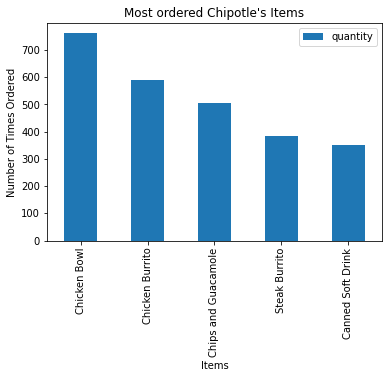

In [72]:
top5.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')
plt.show()

### Seaborn plot

In [73]:
import seaborn as sns

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink')])

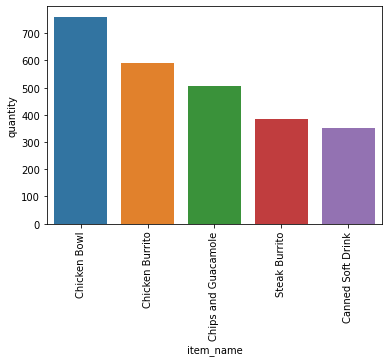

In [74]:
sns.barplot(
    x="item_name",
    y="quantity",
    data=top5.reset_index()
)
plt.xticks(rotation='vertical')

In [75]:
url = 'https://raw.githubusercontent.com/subashgandyer/datasets/main/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')

### Create a Scatterplot to show the number of items ordered with respect to item price

(0.0, 36.7)

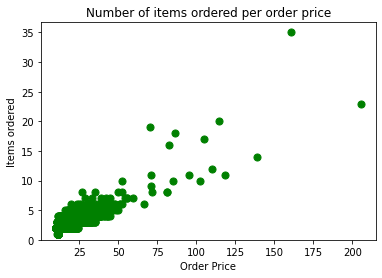

In [76]:
# create a list of prices
# chipo.item_price_corrected = [float(value[1:-1]) for value in chipo.item_price] # strip the dollar sign and trailing space
chipo['item_price_corrected'] = chipo.item_price.str.slice(1).astype(float) # strip the dollar sign and trailing space

# then groupby the orders and sum
orders = chipo.groupby('order_id').sum()

# creates the scatterplot
# plt.scatter(orders.quantity, orders.item_price, s = 50, c = 'green')
plt.scatter(x = orders.item_price_corrected, y = orders.quantity, s = 50, c = 'green')

# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

<AxesSubplot:xlabel='item_price_corrected', ylabel='quantity'>

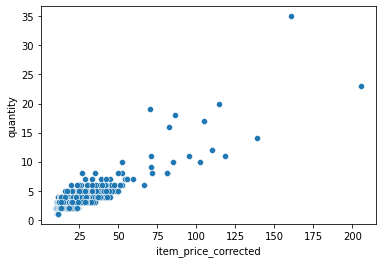

In [77]:
sns.scatterplot(x=orders.item_price_corrected, y=orders.quantity, data=chipo)